### Data Dictionary

In this problem, we will use a dataset that refers to clients of a wholesale distributer. The data describes users' annual spending in monetary units on diverse product categories.  Each observation represents a user.

Our dataset has the following columns:

    userid: a unique integer identifying a user
    Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen: the annual spending that this user has on the category.  For example, the user with userID = 1 has Frozen = 214, which means that this user spent 214 monetary units (m.u) in the Frozen category.  

In this problem, we aim to cluster users by their annual spending per category. Hence, users in the same cluster have similar spending behaviors.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("data_wholesale.csv")

In [3]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,436
436,39228,1431,764,4510,93,2346,437
437,14531,15488,30243,437,14841,1867,438
438,10290,1981,2232,1038,168,2125,439


In [4]:
df.shape

(440, 7)

In [5]:
X = df.iloc[:,0:6]

In [6]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### Use Dendogram

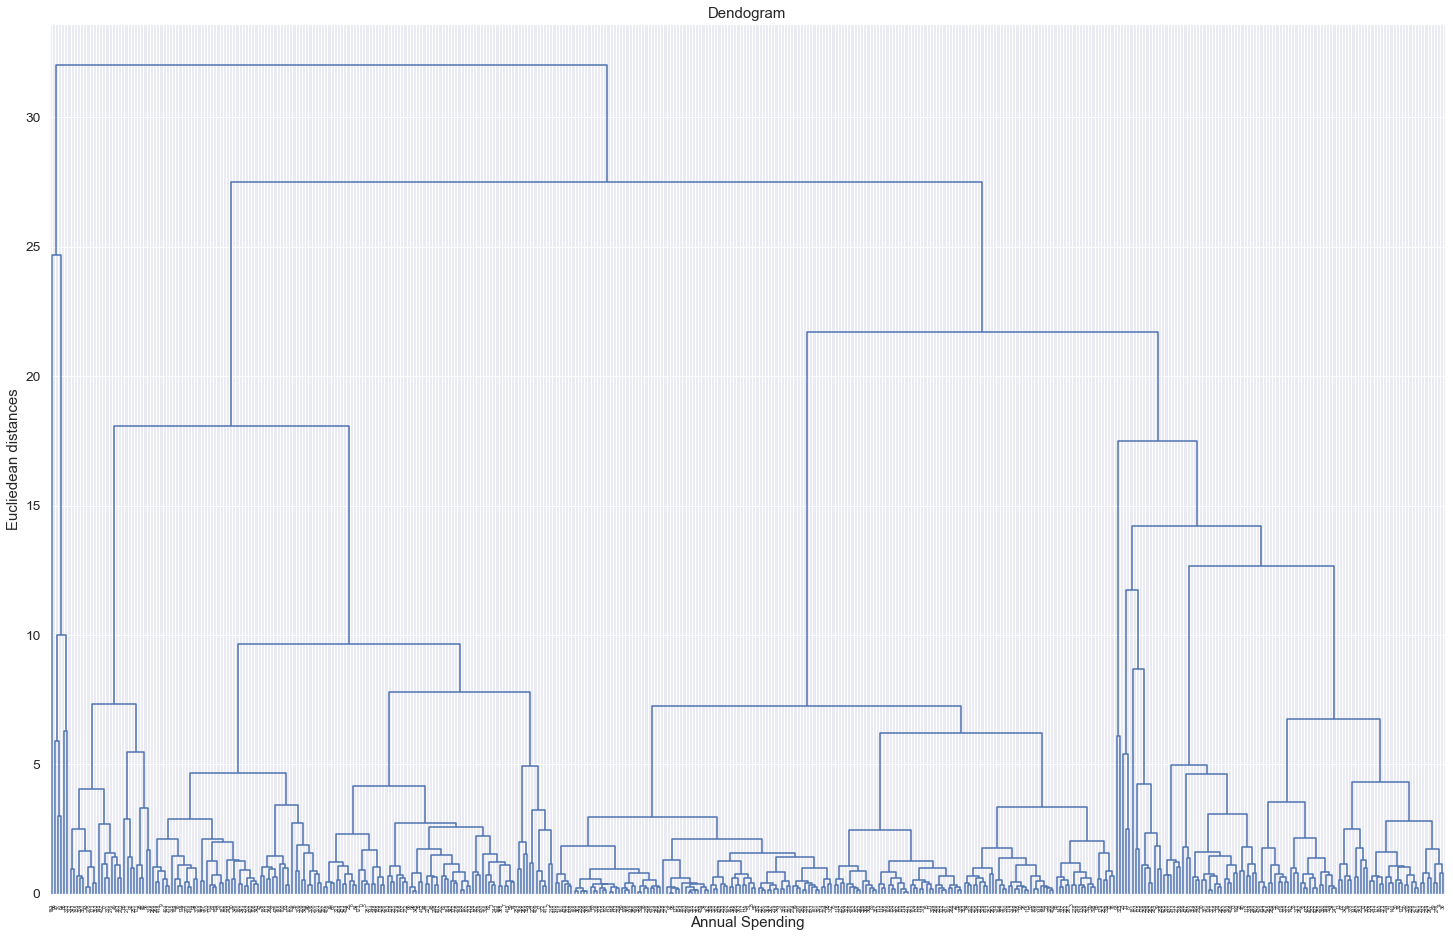

In [10]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Annual Spending")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [11]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(X_scaled)

In [13]:
y_hc

array([2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,

In [14]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [15]:
y

,Cluster
0,2
1,2
2,2
3,0
4,0
...,...
435,0
436,0
437,2
438,0


In [16]:
y['Cluster'].unique()

array([2, 0, 1, 3], dtype=int64)

In [17]:
y['Cluster'].value_counts()

0    281
2    153
1      5
3      1
Name: Cluster, dtype: int64

In [18]:
newdf = pd.concat([df,y],axis=1)

In [19]:
newdf

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid,Cluster
0,12669,9656,7561,214,2674,1338,1,2
1,7057,9810,9568,1762,3293,1776,2,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,4,0
4,22615,5410,7198,3915,1777,5185,5,0
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,436,0
436,39228,1431,764,4510,93,2346,437,0
437,14531,15488,30243,437,14841,1867,438,2
438,10290,1981,2232,1038,168,2125,439,0


In [20]:
meandf = newdf.groupby(by='Cluster').mean()

In [21]:
meandf

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid
Cluster,,,,,,,
0,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356,231.053381
1,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,123.400000
2,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843,204.529412
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,184.000000


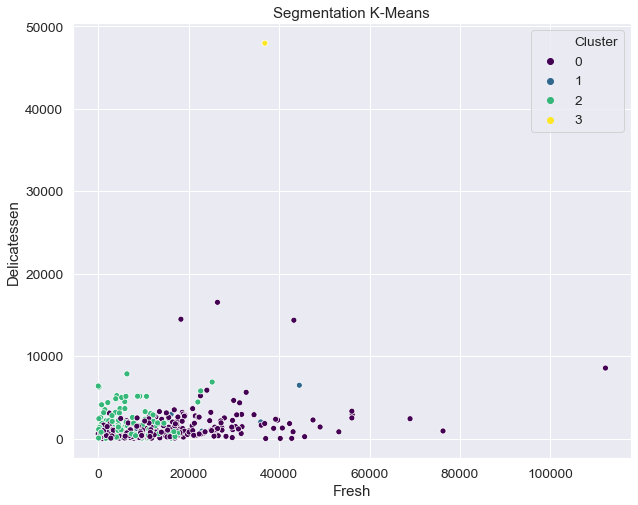

In [22]:
x_axis = newdf['Fresh']
y_axis = newdf['Delicatessen']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

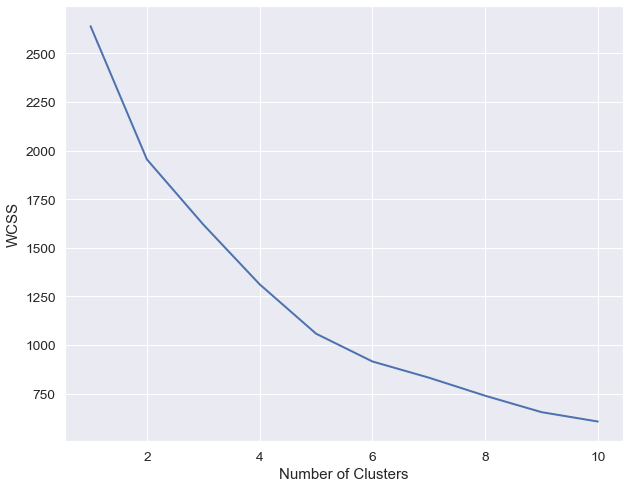

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [25]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)

In [26]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [27]:
df_segm_kmeans = df.copy()

In [28]:
df_segm_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,436
436,39228,1431,764,4510,93,2346,437
437,14531,15488,30243,437,14841,1867,438
438,10290,1981,2232,1038,168,2125,439


In [29]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [30]:
df_segm_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid,Segment K-Means
0,12669,9656,7561,214,2674,1338,1,0
1,7057,9810,9568,1762,3293,1776,2,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,4,0
4,22615,5410,7198,3915,1777,5185,5,0
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,436,0
436,39228,1431,764,4510,93,2346,437,0
437,14531,15488,30243,437,14841,1867,438,2
438,10290,1981,2232,1038,168,2125,439,0


In [31]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [32]:
df_segm_analysis

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid
Segment K-Means,,,,,,,
0,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696,230.177215
1,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,179.000000
2,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909,202.463636
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,129.700000


In [33]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','Fresh']].groupby(['Segment K-Means']).count()

In [34]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [35]:
df_segm_analysis

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,
0,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696,230.177215,316,0.718182
1,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,179.000000,4,0.009091
2,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909,202.463636,110,0.250000
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,129.700000,10,0.022727


In [36]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D'},inplace=True)

In [37]:
df_segm_analysis

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,
A,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696,230.177215,316,0.718182
B,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,179.000000,4,0.009091
C,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909,202.463636,110,0.250000
D,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,129.700000,10,0.022727


In [38]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D'})

In [39]:
df_segm_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid,Segment K-Means,Labels
0,12669,9656,7561,214,2674,1338,1,0,A
1,7057,9810,9568,1762,3293,1776,2,2,C
2,6353,8808,7684,2405,3516,7844,3,2,C
3,13265,1196,4221,6404,507,1788,4,0,A
4,22615,5410,7198,3915,1777,5185,5,0,A
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,436,0,A
436,39228,1431,764,4510,93,2346,437,0,A
437,14531,15488,30243,437,14841,1867,438,2,C
438,10290,1981,2232,1038,168,2125,439,0,A


### Plot the clusters

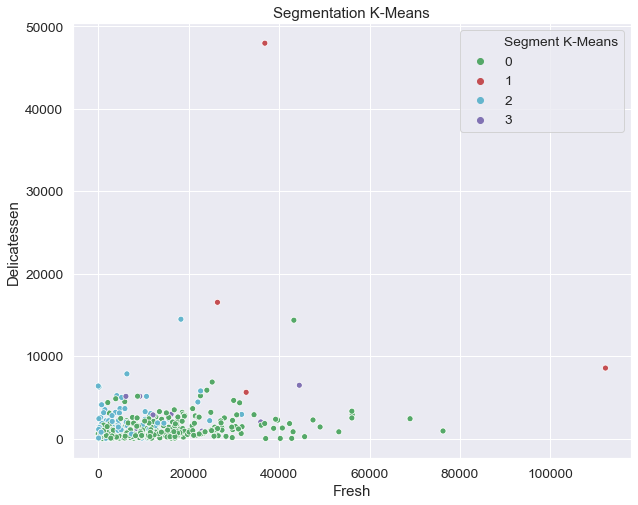

In [40]:
x_axis = df_segm_kmeans['Fresh']
y_axis = df_segm_kmeans['Delicatessen']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Segment K-Means'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()